In [6]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [7]:
#setting the path
os.chdir("C:/Users/ariam/Google Drive/Formation-energy1/New folder/workshop")
print(os.getcwd())

C:\Users\ariam\Google Drive\Formation-energy1\New folder\workshop


In [8]:
#reading the files; variables.csv contains the feature set created based on compositional variables as described in the power point
#formationenergy-y.csv contains the y values (labels), in this case, formation energies of corresponding compounds extracted from Materials Project
PE = pd.read_csv('variables.csv')
Y_form = pd.read_csv('formationenergy-y.csv')

In [9]:
data = PE.values
data.data.shape

(693, 80)

In [10]:
labels = Y_form.values
labels = np.ravel(labels)
labels.data.shape

(693,)

In [70]:
#splitting the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.9, test_size=0.1,random_state=142, shuffle=True)#linear regression, learning curve

In [71]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
normalizer = preprocessing.Normalizer().fit(X_train)
normalizer
X_train=normalizer.transform(X_train)
X_test=normalizer.transform(X_test)

In [72]:
y_test.data.shape

(70,)

R2 on training set:0.762819
R2 on test set:0.719117
mse: 0.165089, rmse: 0.406312


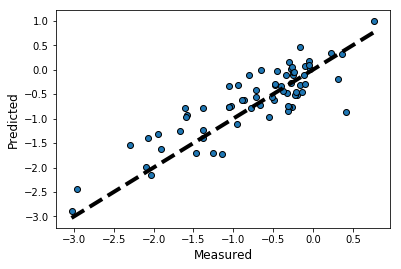

In [73]:
#linear regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
linear_regression = LinearRegression().fit(X_train, y_train)
predict_y = linear_regression.predict(X_test)
predict1_y = linear_regression.predict(X_train)
mse = mean_squared_error(y_test, predict_y)
rmse = np.sqrt(mse)
print("R2 on training set:%f" % linear_regression.score(X_train, y_train))
print("R2 on test set:%f" % linear_regression.score(X_test, y_test))
print("mse: %f, rmse: %f" % (mse, rmse))

fig, ax = plt.subplots()
ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_aspect('auto')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
plt.show()


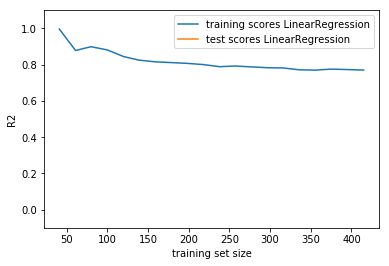

In [74]:
#linear regression, learning curve
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(0.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '-', label = "training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name)
    plt.xlabel('training set size')
    plt.ylabel('R2')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)
plt.figure()
plot_learning_curve(LinearRegression(), X_train, y_train)


In [106]:
#rbf svr
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,10,32], 'gamma': [0.1,1]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
grid.score(X_test, y_test)

{'C': 10, 'gamma': 1}


0.89799186148093035

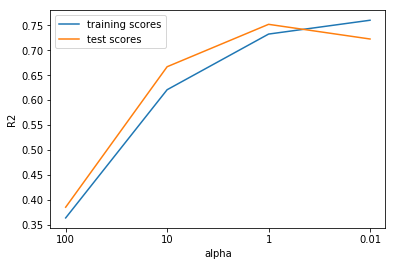

In [76]:
#adding the regularization - ridge regression
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

R2 on training set:0.732701
R2 on test set:0.752285
mse: 0.145595, rmse: 0.381570


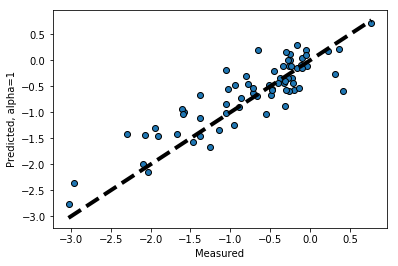

In [77]:
#linear ridge regression

ridge = Ridge(alpha=1).fit(X_train, y_train)
predict_y = ridge.predict(X_test)
predict1_y = ridge.predict(X_train)
mse = mean_squared_error(y_test, predict_y)
rmse = np.sqrt(mse)
print("R2 on training set:%f" % ridge.score(X_train, y_train))
print("R2 on test set:%f" % ridge.score(X_test, y_test))
print("mse: %f, rmse: %f" % (mse, rmse))

fig, ax = plt.subplots()
ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted, alpha=1')
plt.show()

R2 on training set:0.983912
R2 on test set:0.870061
mse: 0.105575, rmse: 0.324923


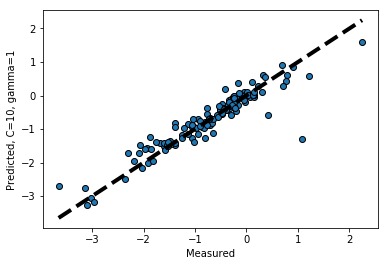

In [73]:
#support vector regression
SVM = SVR(C=10, gamma=1).fit(X_train, y_train)
predict_y = SVM.predict(X_test)
predict1_y = SVM.predict(X_train)
mse = mean_squared_error(y_test, predict_y)
rmse = np.sqrt(mse)
print("R2 on training set:%f" % SVM.score(X_train, y_train))
print("R2 on test set:%f" % SVM.score(X_test, y_test))
print("mse: %f, rmse: %f" % (mse, rmse))

fig, ax = plt.subplots()
ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted, C=10, gamma=1')
plt.show()


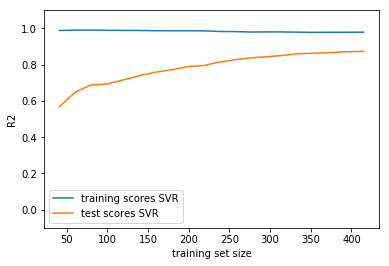

In [107]:
#SVR, learning curve
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(0.1, 1, 20,100))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '-', label = "training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name)
    plt.xlabel('training set size')
    plt.ylabel('R2')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)
plt.figure()
plot_learning_curve(SVR(C=10,gamma=1), X_train, y_train)

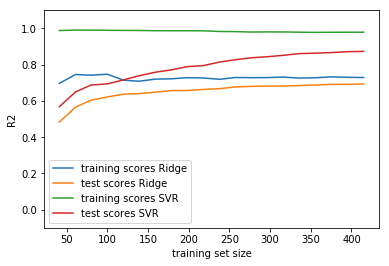

In [25]:
plt.figure()

plot_learning_curve(Ridge(alpha=1), X_train, y_train)
plot_learning_curve(SVR(C=10,gamma=1), X_train, y_train)

In [78]:
C_range = np.logspace(-1, 2, 15)
gamma_range = np.logspace(-2, 2, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-02,   2.78256e-02,   7.74264e-02,   2.15443e-01,
         5.99484e-01,   1.66810e+00,   4.64159e+00,   1.29155e+01,
         3.59381e+01,   1.00000e+02]), 'C': array([   0.1    ,    0.16379,    0.26827,    0.4394 ,    0.71969,
          1.17877,    1.9307 ,    3.16228,    5.17947,    8.48343,
         13.89495,   22.75846,   37.27594,   61.05402,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

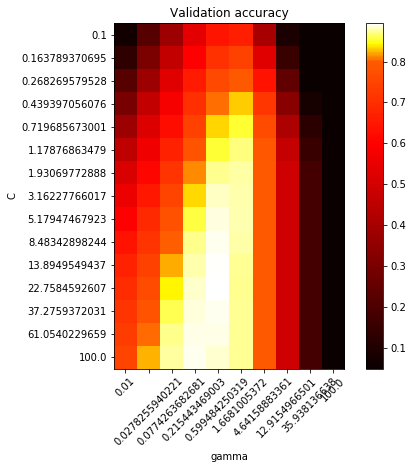

In [79]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
# Visualization
#
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.05, midpoint=0.80))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()